# Steps:

Here we first get the trajectories of Tubuli and Glomeruli and then we combine the time and use the combination for finding morpholagical features.

* It should note PILOT creats split folder for each data set and puts the all results there.
* You just need to prvide two data for your interested dataset:
 1. One for annotations such as "cell_type","sampleID" and "status", please make sure to provid these names and the same order for them in your final annot data (check the data with "annot_data_" prefix in Dataset" and see the structures). 
 2. The second data that you need to give to PILOT is the gene expression/morphologica features that it could be also the principal components, without any extra info such name cells or smaples and so on..(check the data with "gene_expression_" prefix in Dataset and see the structures).
 3. Here valiga tubuli indicates "kidney IgAN Tubuli" and valiga glomeruli indicates "kidney IgAN Glomeruli".

In [1]:
from PILOT import *
warnings.filterwarnings('ignore')

# Tubuli

## Load data

In [2]:
#If you already have gene_expression and annotation of data, use the below functions.

path_dataset='Datasets/'  #Path to read datasets
name_dataset='valiga_tubuli'
path_to_results=set_path_for_results(name_dataset) #set the path for results
annot_tubuli=annot=load_annot(path_dataset,name='annot_data_'+name_dataset)  #Load annot data.
data_tubuli=data=load_expression(path_dataset,name='gene_expression_'+name_dataset) #Load expression data


### Cluster representations by estimating regularized probability distributions of cell types per sample:

In [3]:
Clu_rep = Cluster_Representations(annot,regulizer = 0.1,regularization=True) # Regularization

### Calcuating  cost matrix between clusters:

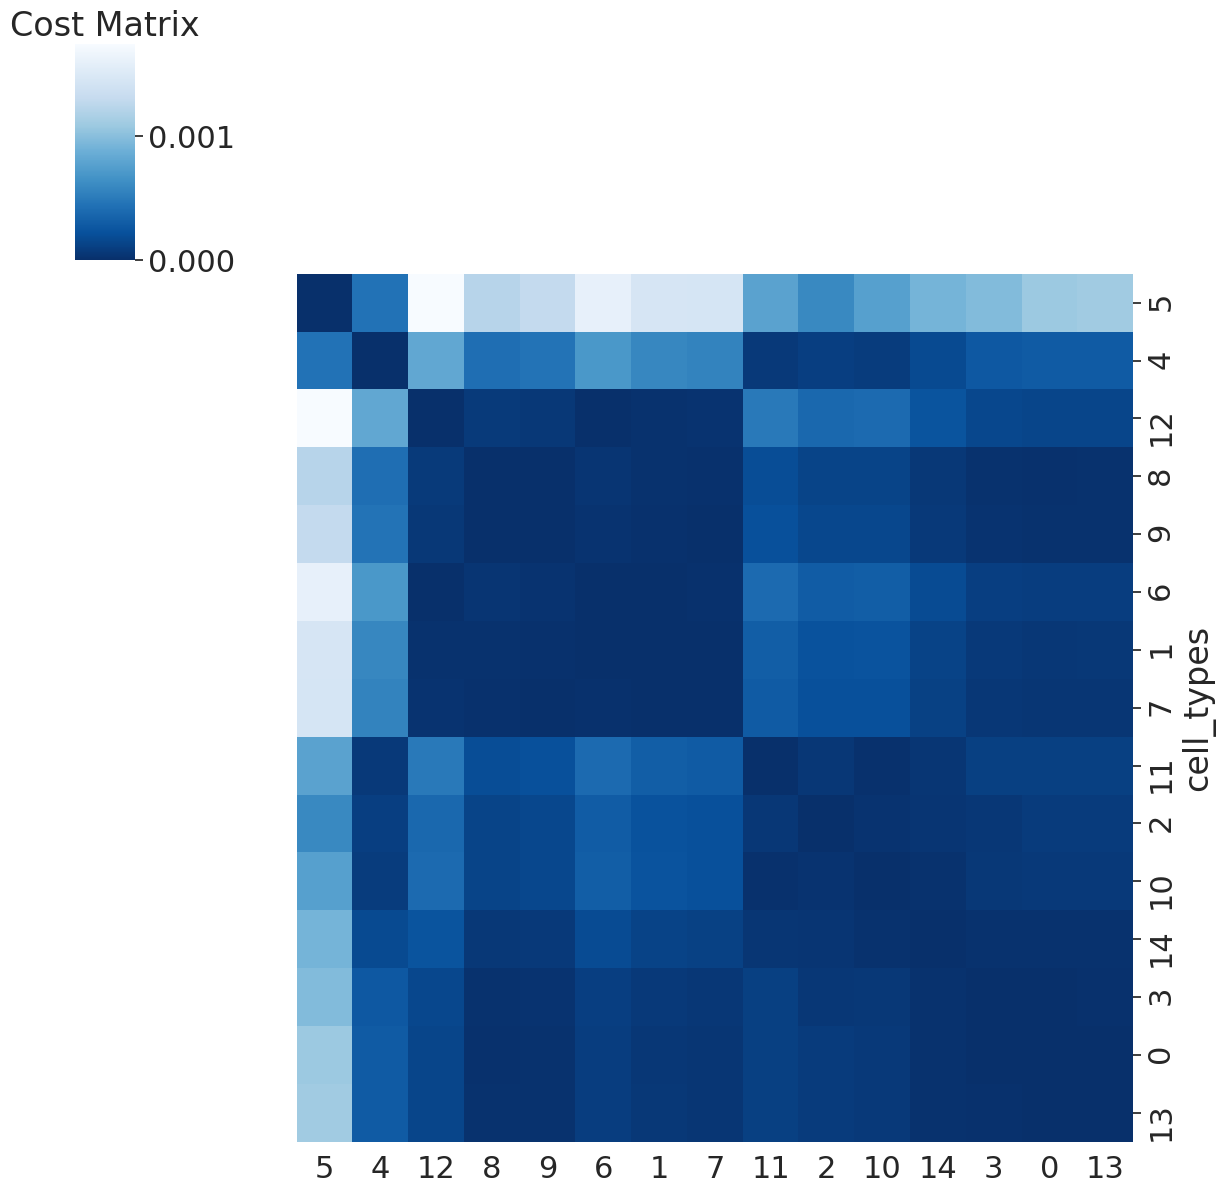

In [4]:
dis= cost_matrix(annot, data,path_to_results,cell_col = 0)

###  Estimate the Wasserstein distance:

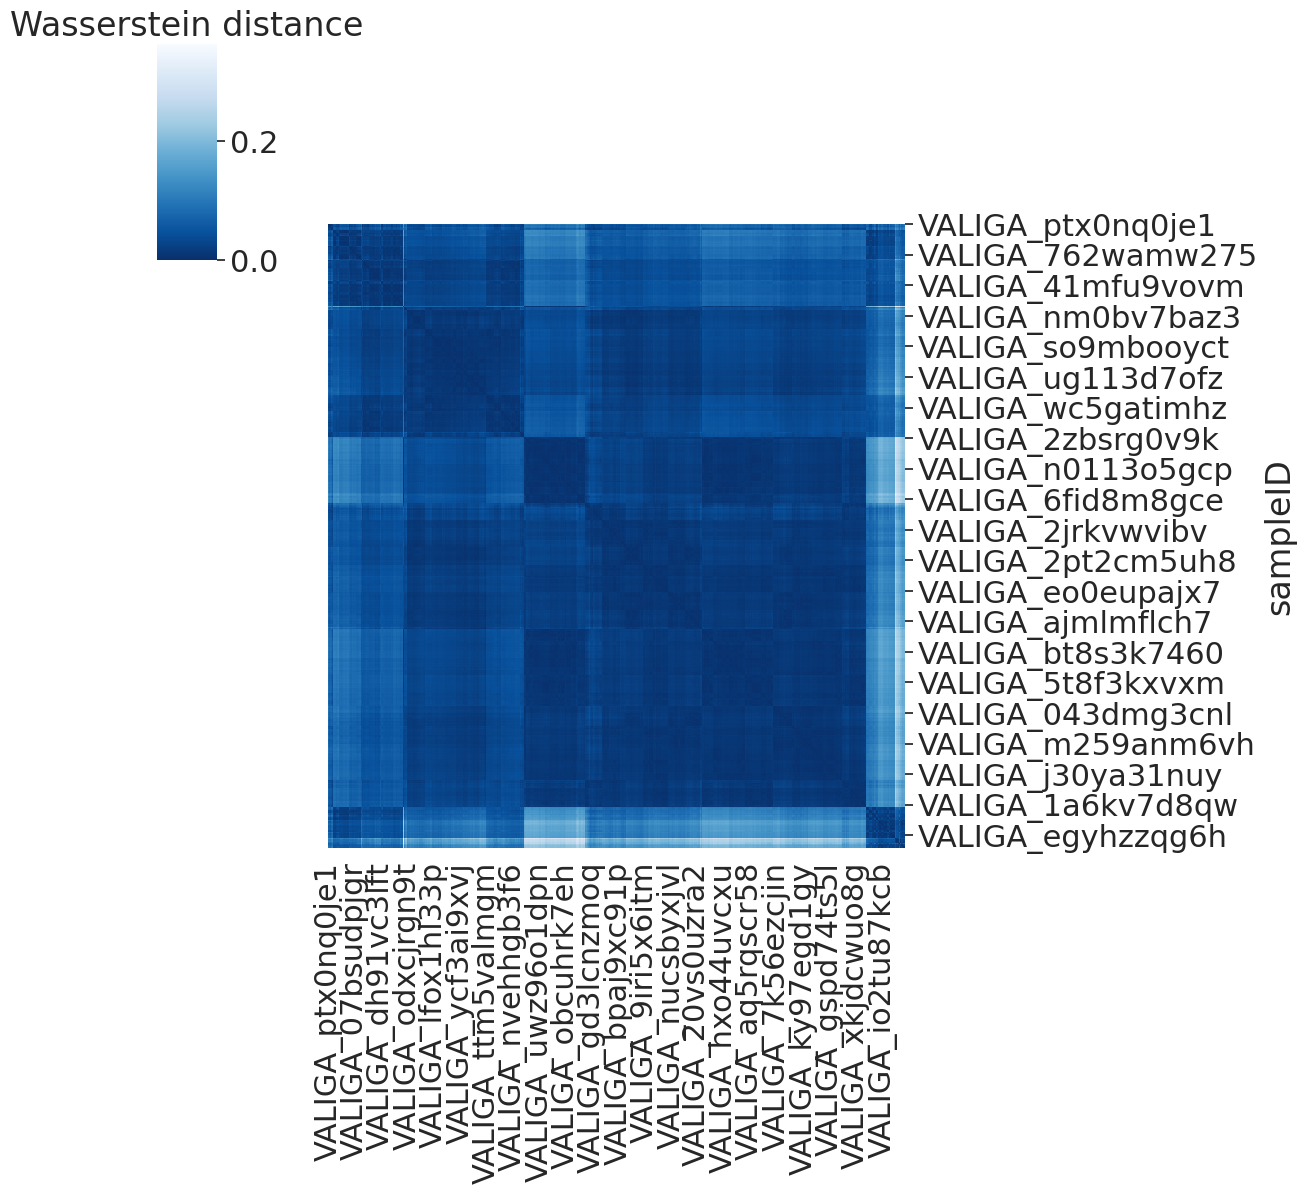

In [5]:
EMD = wasserstein_d(Clu_rep,dis/dis.max(),regularized = 'unreg',path = path_to_results)

### Evaluation

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
Cluster labels:  ['<30' '>60' '30-60']
ARI:  0.5832772686271871
Silhouette score:  0.10287634319086071


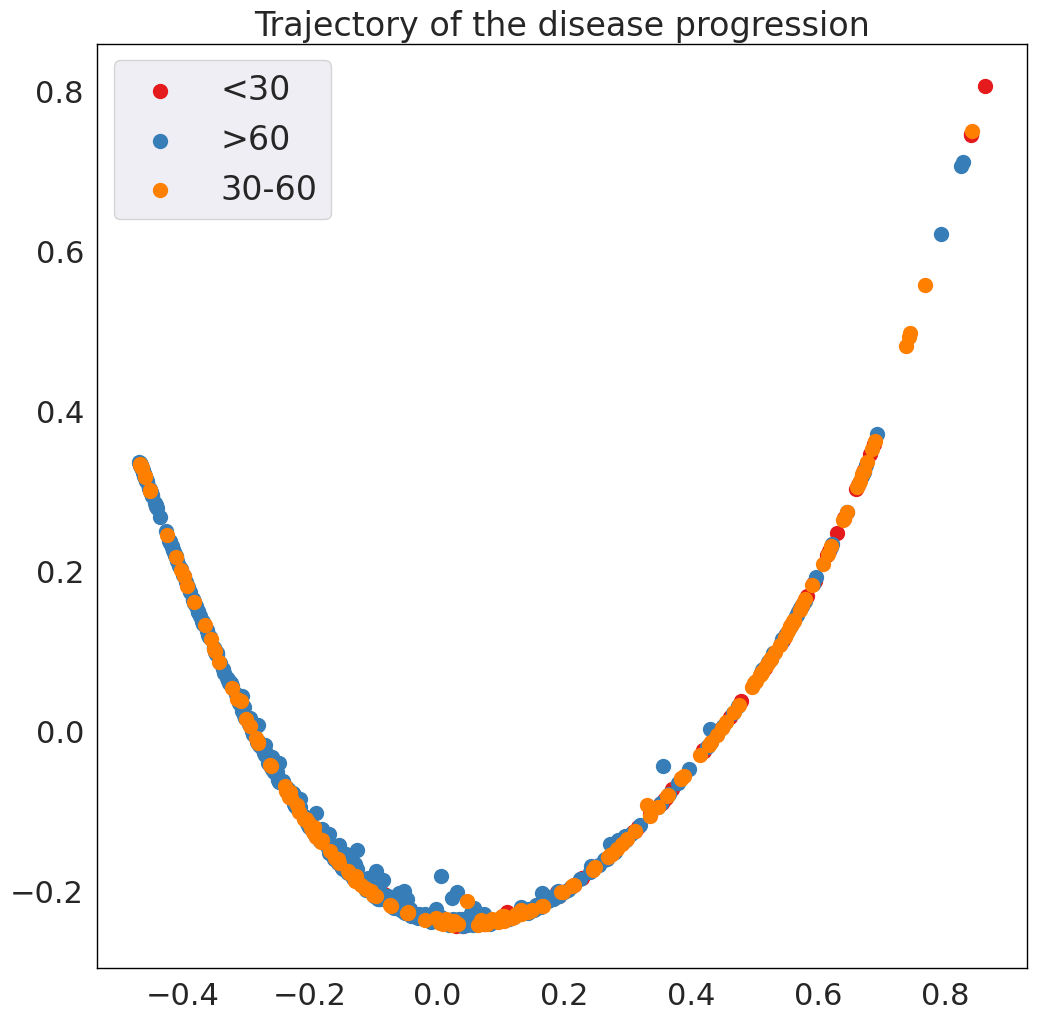

In [6]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD/EMD.max(), annot,category ='status', sample_col=1, res = 0.01)
#Computing Sil
Silhouette = Sil_computing(EMD/EMD.max(), real_labels, metric = 'cosine',space = 'diffusion')

#Drawing diffusion map
emd_tubuli=trajectory(EMD/EMD.max(), predicted_labels, annot, embed_coord = 'diffusion',path = path_to_results,label_act=False,location_labels='best',colors=['#e41a1c','#377eb8','#ff7f00'] )


# Glomeruli

## Load data

In [7]:
#If you already have gene_expression and annotation of data, use the below functions.

path_dataset='Datasets/'  #Path to read datasets
name_dataset='valiga_glomeruli'


path_to_results=set_path_for_results(name_dataset) #set the path for results
annot_glom=annot=load_annot(path_dataset,name='annot_data_'+name_dataset)  #Load annot data.
data_glom=data=load_expression(path_dataset,name='gene_expression_'+name_dataset) #Load expression data


### Cluster representations by estimating regularized probability distributions of cell types per sample:

In [8]:
Clu_rep = Cluster_Representations(annot,regulizer = 0.1,regularization=True) # Regularization

### Calcuating  cost matrix between clusters:

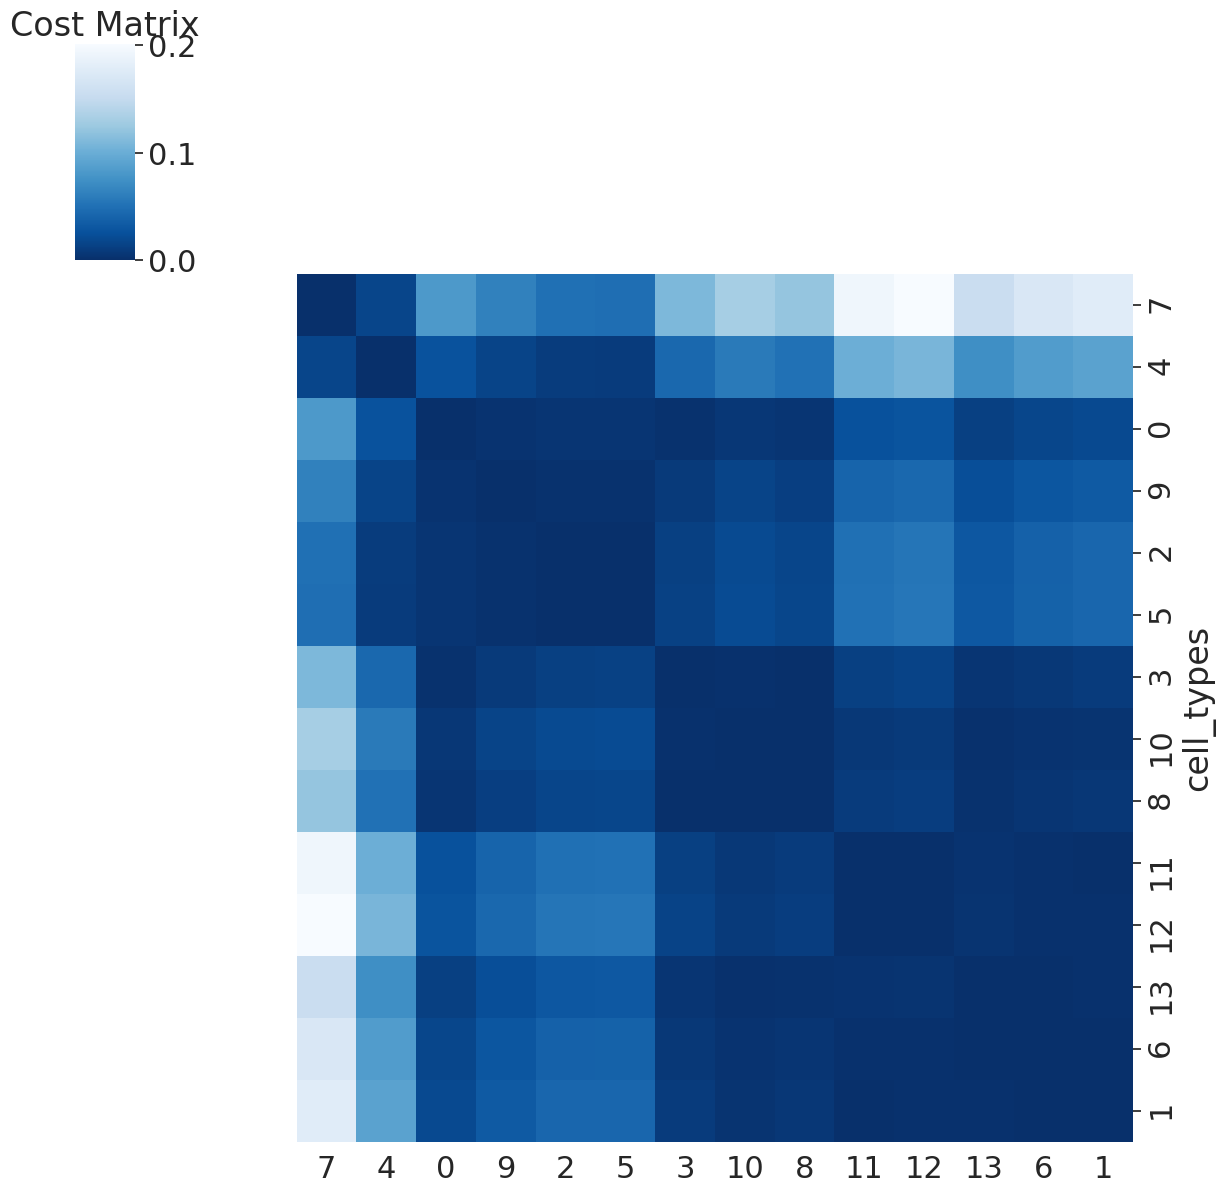

In [9]:
dis= cost_matrix(annot, data,path_to_results,cell_col = 0)

###  Estimate the Wasserstein distance:

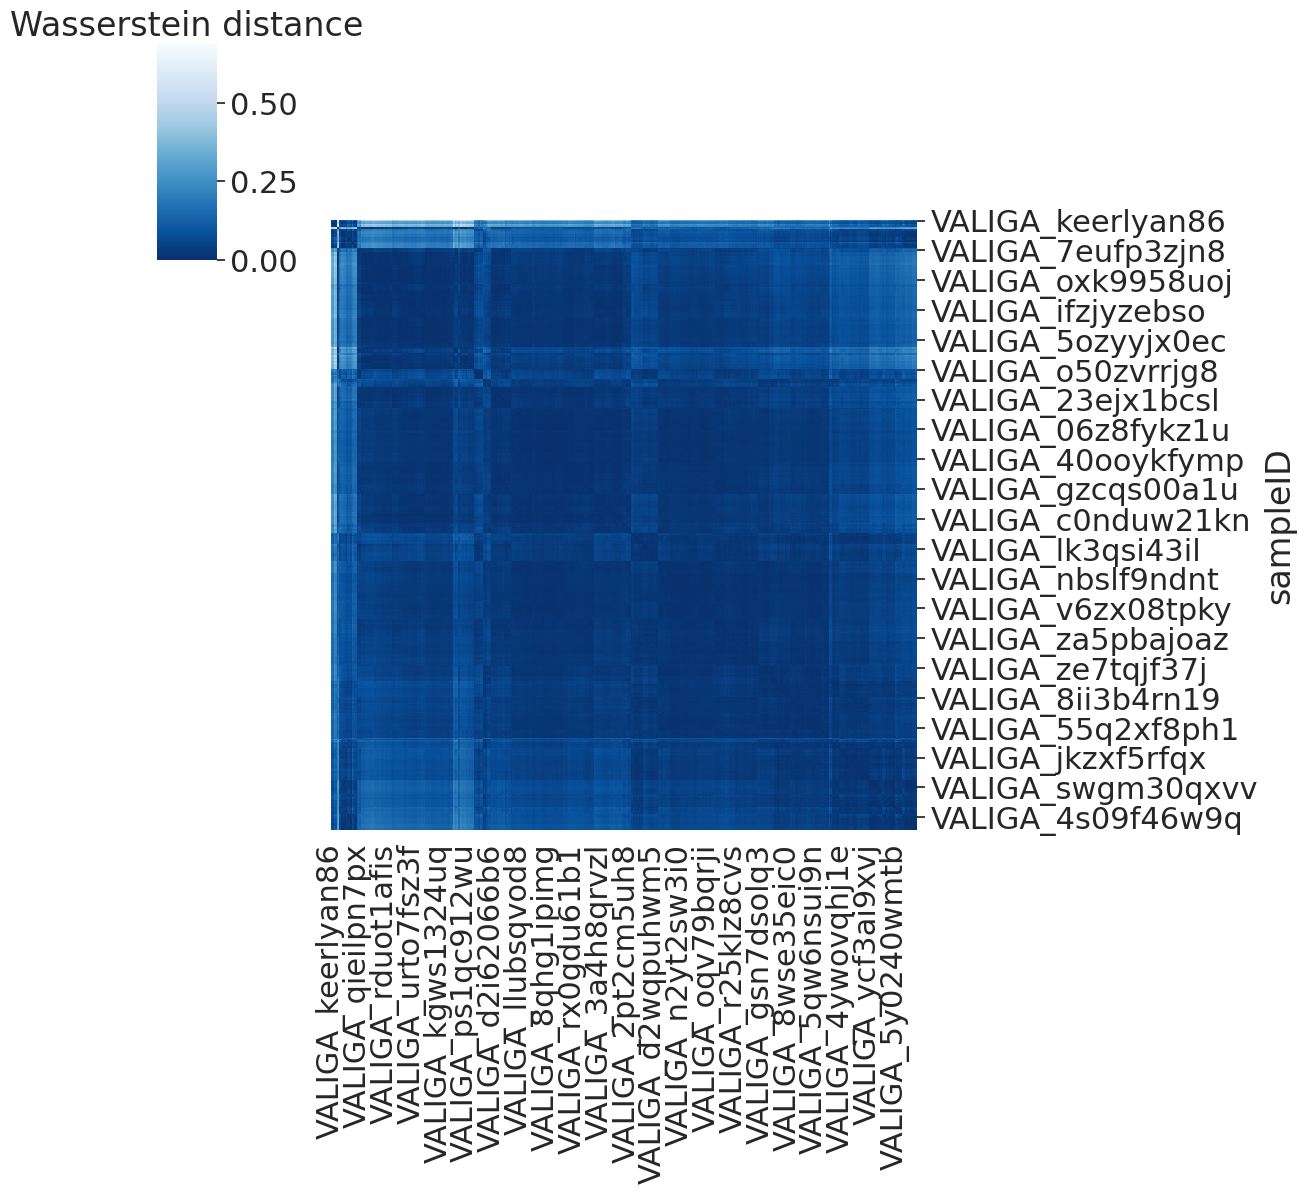

In [10]:
EMD = wasserstein_d(Clu_rep,dis/dis.max(),regularized = 'unreg',path = path_to_results)

### Evaluation

         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.
Cluster labels:  ['<30' '>60' '30-60']
ARI:  0.5562466049705722
Silhouette score:  0.07819445486115842


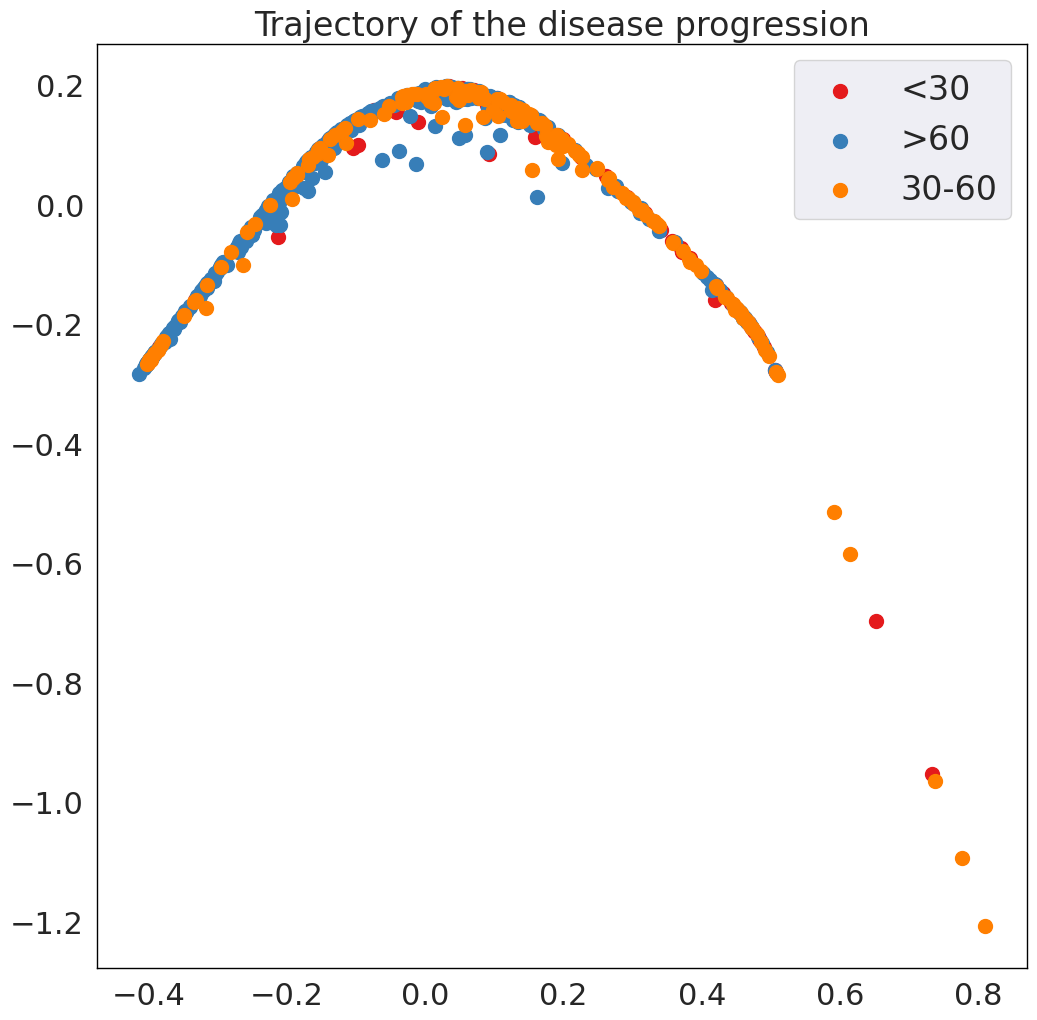

In [13]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD/EMD.max(), annot,category ='status', sample_col=1, res = 0.01)
#Computing Sil
Silhouette = Sil_computing(EMD/EMD.max(), real_labels, metric = 'cosine',space = 'diffusion')

#Drawing diffusion map
emd_glomeruli=trajectory(EMD/EMD.max(), predicted_labels, annot, embed_coord = 'diffusion',path = path_to_results,label_act=False,location_labels='best',colors=['#e41a1c','#377eb8','#ff7f00'] )


### Cell-type Importance Glomeruli:

* In this step we get the orders of samples

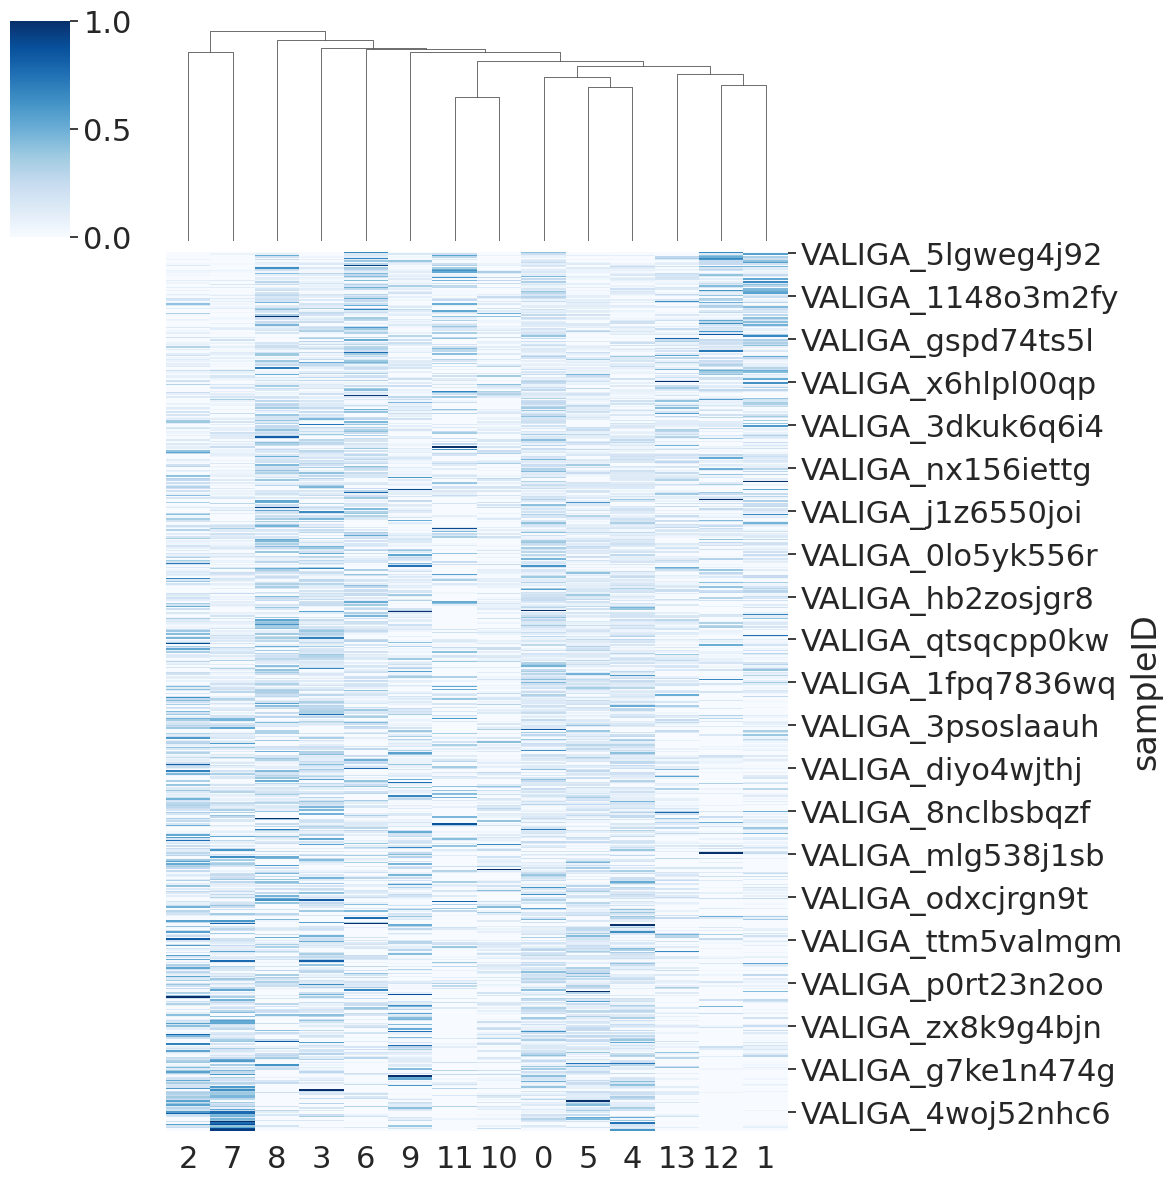

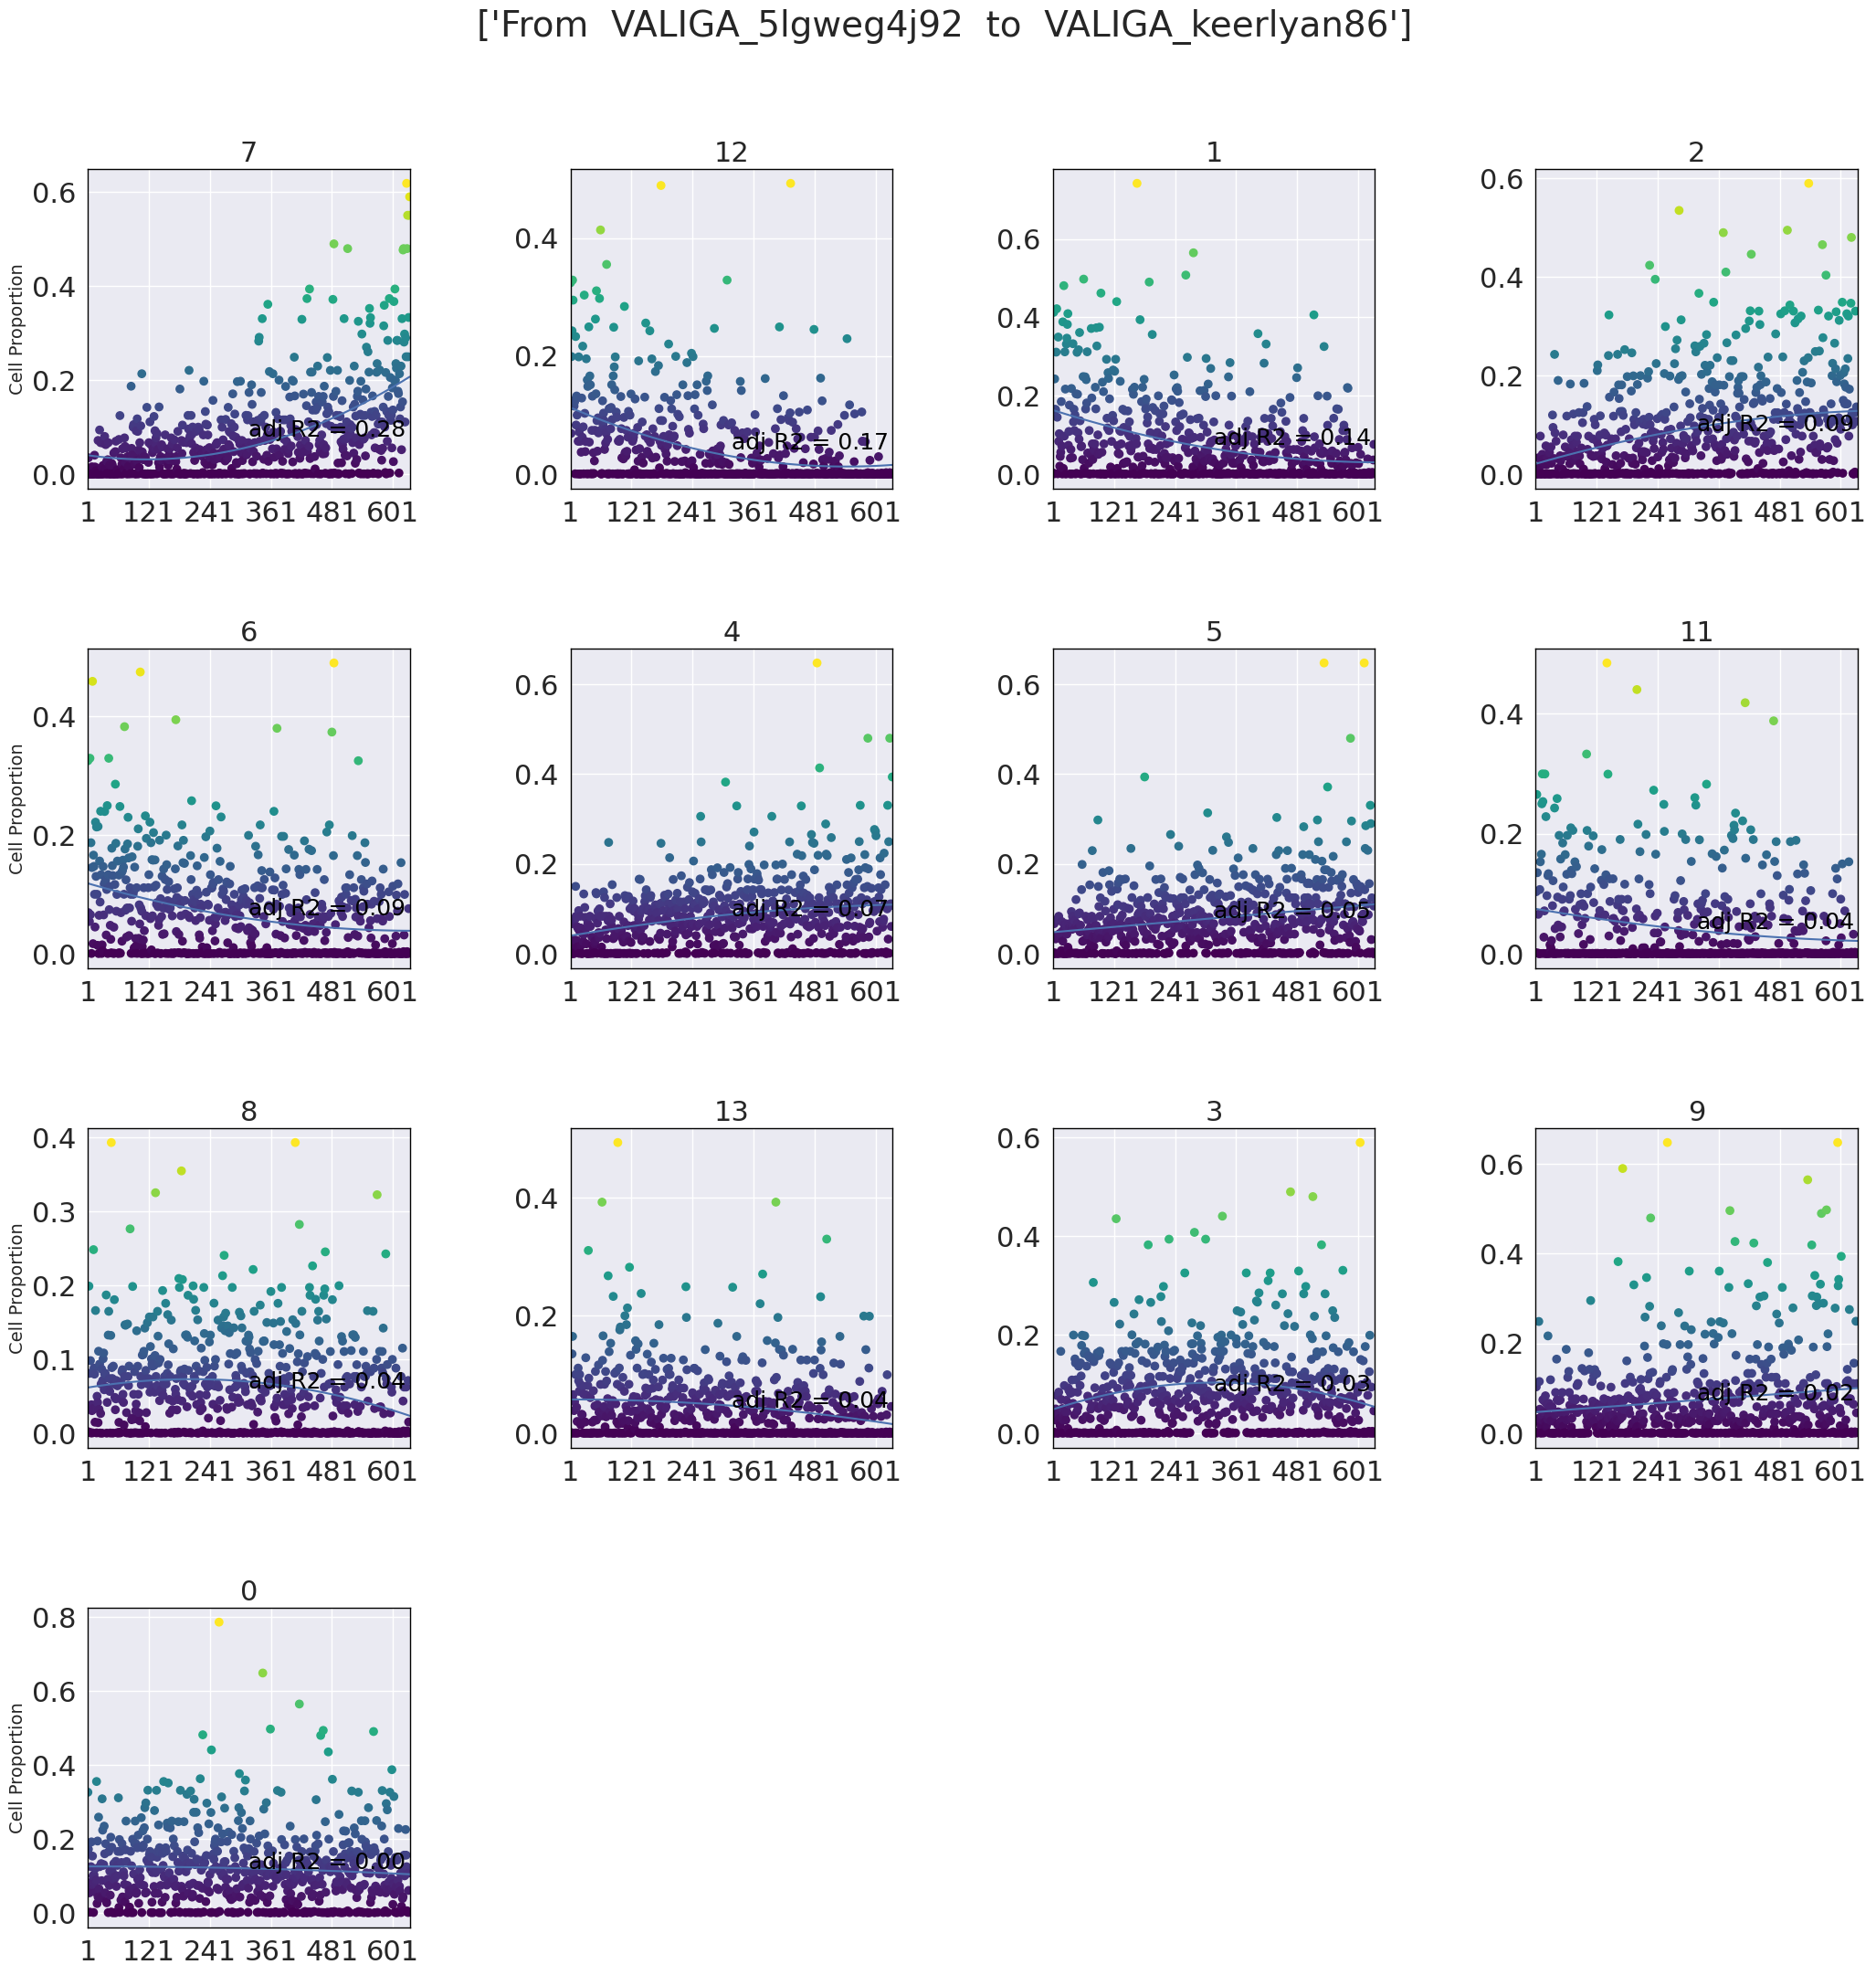

In [14]:
embedding_diff=emd_glomeruli+emd_tubuli #here we sum up the embeddings of Tubuli and glomeruli for next analysis
orders,cell_names=Cell_importance(Clu_rep,annot,embedding_diff,real_labels,path=path_to_results,sort_axis='emb_x',width=30,height=35,xlim=120,p_val=0.5)

# Glomeruli Features based on Combination:

### Saving morphological features and map them with the obtained order by PILOT  (for Glomeruli)

In [15]:

data_glom['sampleID']=list(annot_glom['sampleID'])
joint=pd.merge(data_glom,orders,on='sampleID')
if not os.path.exists(path_to_results+'/cells/'):  
                os.makedirs(path_to_results+'/cells/')
joint.to_csv(path_to_results+'/cells/'+'All.csv')

### Feature selection:
* You should have the same trajectories for Glomeruli and Tubuli with the tutorial to get the same order, otherwise redo the part of evauation for both and once you get the same trajectory try!

Name of Cell type : All
sparsity:6.486269746268921e-05
For this cell_type, p-value of  14 genes are statistically significant.
  Expression pattern  count
0        linear down      7
1          linear up      4
3       quadratic up      2
2     quadratic down      1
data saved successfully


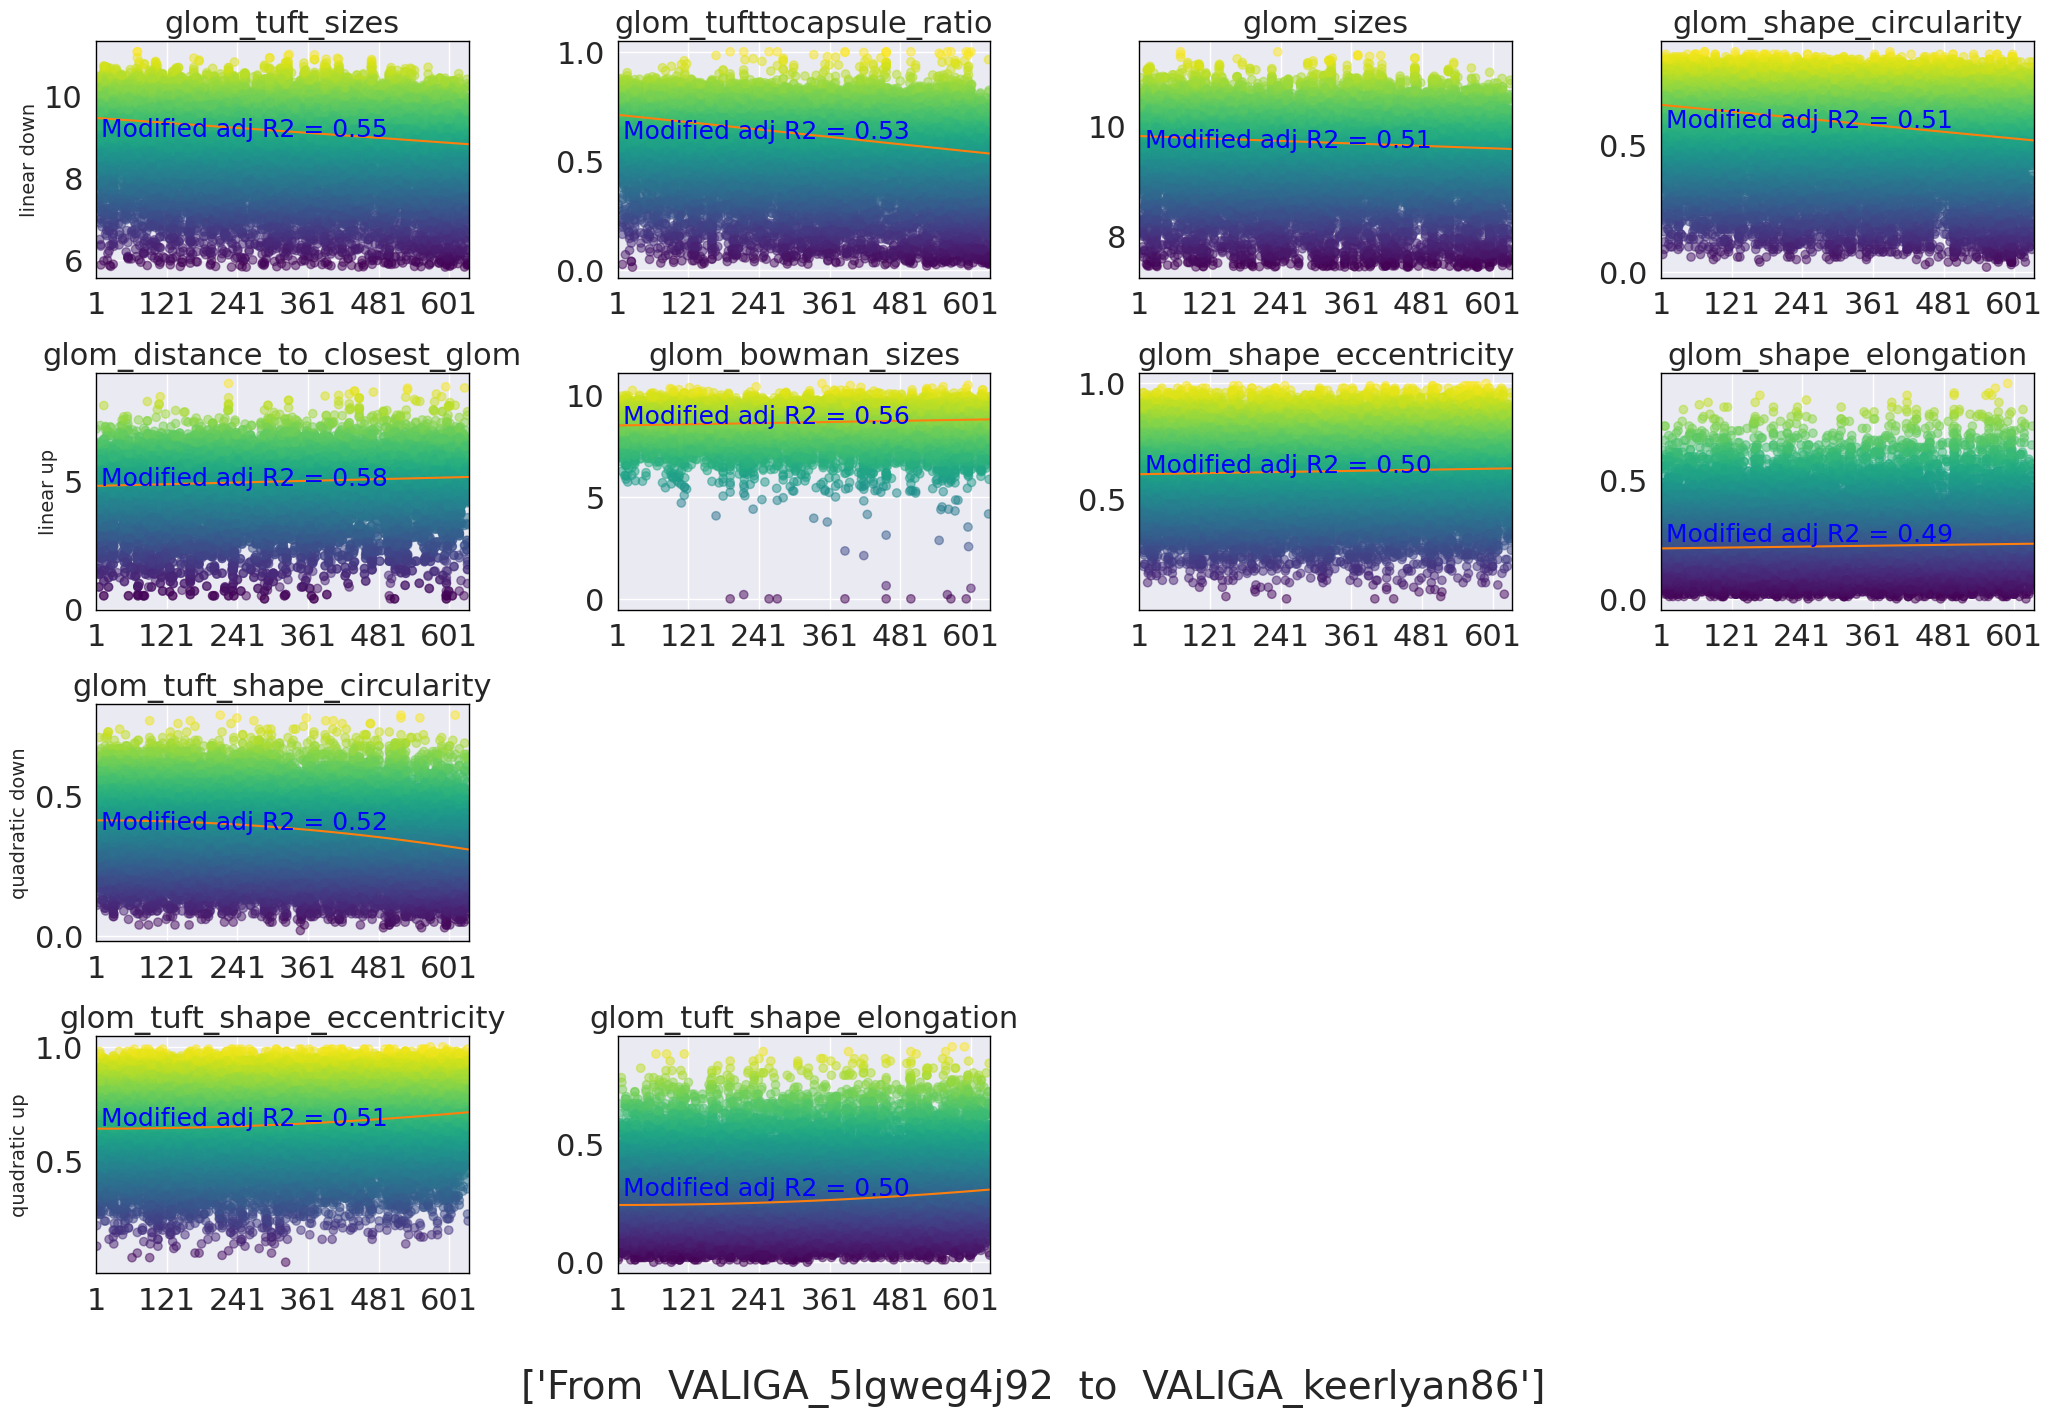

In [16]:
cell_n='All'
data =loadTarget(path_to_results+'/cells/', cell_n)
colss=['glom_sizes',
 'glom_distance_to_closest_glom',
 'glom_diameters',
 'glom_tuft_sizes',
 'glom_bowman_sizes']
for col in colss:
    data[col]=np.log(data[col]+1)
pro=proportions(data)
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(0, 14)),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,x_lim=120,store_data=1,modify_r2=True)

# Tubuli based on Combination

### Saving morphological features and map them with the obtained order by PILOT  (for Tubuli)

In [17]:

path_to_results='Results_PILOT/valiga_tubuli'
data_tubuli['sampleID']=list(annot_tubuli['sampleID'])
joint=pd.merge(data_tubuli,orders,on='sampleID')
if not os.path.exists(path_to_results+'/cells/'):  
                os.makedirs(path_to_results+'/cells/')
joint.to_csv(path_to_results+'/cells/'+'All.csv')

### Feature selection

Name of Cell type : All
sparsity:0.0
For this cell_type, p-value of  3 genes are statistically significant.
  Expression pattern  count
0        linear down      2
1          linear up      1
data saved successfully


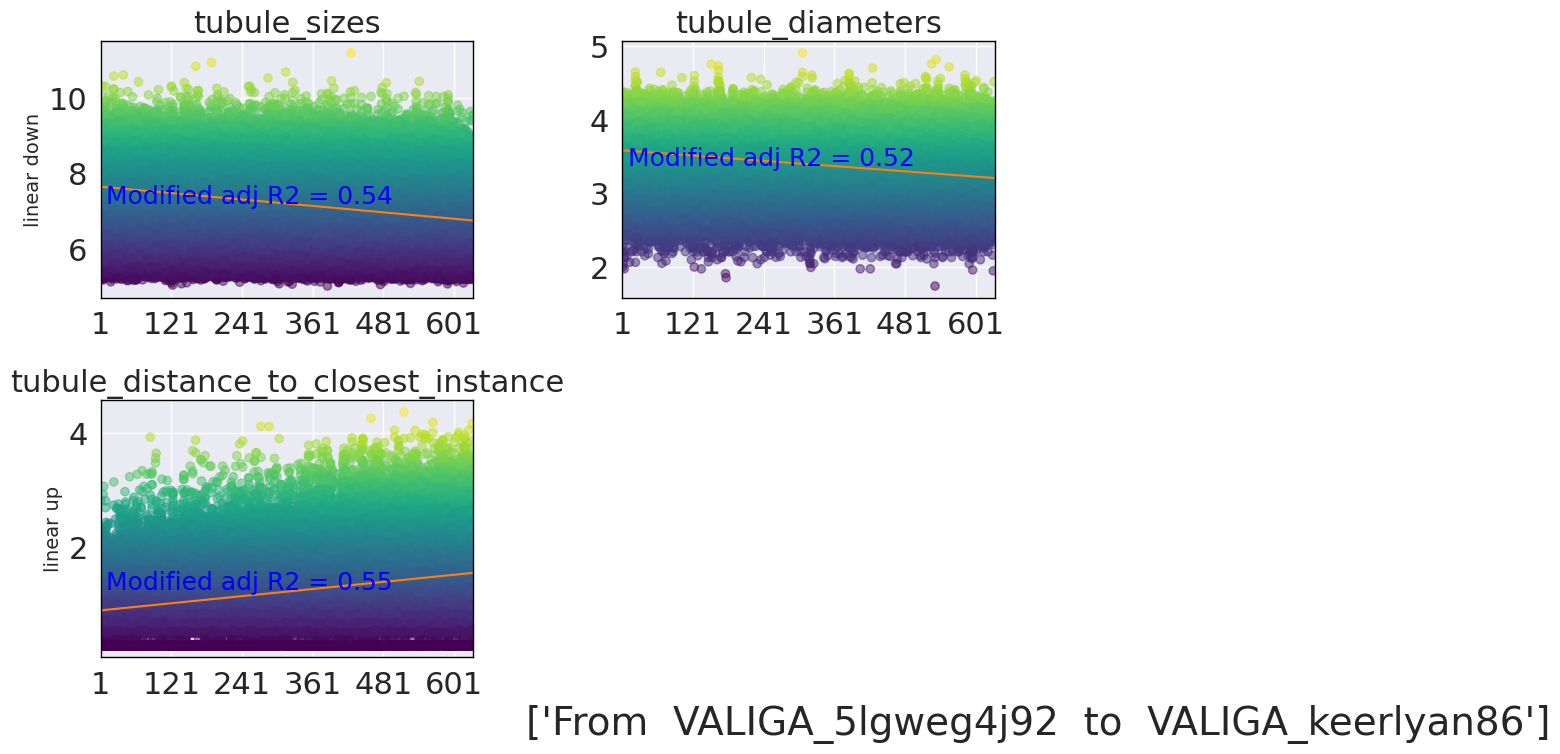

In [18]:
cell_n='All'
data =loadTarget(path_to_results+'/cells/', cell_n)
colss=['tubule_diameters',
 'tubule_sizes',
 'tubule_distance_to_closest_instance']
for col in colss:
    data[col]=np.log(data[col]+1)
pro=proportions(data)
genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(0, 3)),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,x_lim=120,store_data=1,modify_r2=True)